#### **Langchain Memory**

In LangChain, memory refers to the ability of a chain or agent to retain information across interactions, simulating a “stateful” conversation.

- Reference Video : [Sunny Savita Langchain Memory](https://youtu.be/cydntJObPLI?si=qlZOGiOdn5yZZBN_)

In [1]:
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.memory import (ConversationBufferMemory,ConversationBufferWindowMemory,ConversationSummaryMemory,
                              ConversationSummaryBufferMemory,ConversationEntityMemory)
from langchain_groq import ChatGroq
from langchain.schema import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough,RunnableLambda
from operator import itemgetter

In [2]:
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.3)

##### 1. ConversationBufferMemory

✅ Pros:
- Simple to use
- Full message history

❌ Cons:
- Grows indefinitely
- Memory bloat in long conversations

In [3]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "{input}"),
        MessagesPlaceholder(variable_name="history"),
    ]
)

In [ ]:
memory = ConversationBufferMemory(return_messages=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12848\3033496287.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(k=2,return_messages=True)


In [6]:
chain = (
    RunnablePassthrough.assign(history=RunnableLambda(memory.load_memory_variables) | itemgetter("history"))
    | prompt
    | llm
    | StrOutputParser()
)

In [7]:
def query_llm(input):
    response = chain.invoke({"input": input})
    memory.chat_memory.add_user_message(input)
    memory.chat_memory.add_ai_message(response)
    return response

In [15]:
Input = input("Ask question to LLama3 : ")
query_llm(Input)

" I'll do my best to recall it in our conversation. However, please note that I'm a large language model, I don't have personal memories, so if we start a new conversation in the future, I might not remember your name. But for now, hello again, Hrishikesh. How can I assist you today?"

In [16]:
# shows the complete chat_history 
memory.chat_memory.messages

[HumanMessage(content='How are you doing today ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How about you? How's your day going so far?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi my name is Hrishikesh remember my name.', additional_kwargs={}, response_metadata={}),
 AIMessage(content=' By the way, I remember that your name is Hrishikesh.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Can you tell me my name? I forget what my name is ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content=" I'll do my best to recall it in our conversation. However, please note that I'm a large language model, I don't have personal memories, so if we start a new conversation in the future, I might not remem

In [17]:
# stores the chat_history as per the define window size.
memory.load_memory_variables({})["history"]

[HumanMessage(content='How are you doing today ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How about you? How's your day going so far?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi my name is Hrishikesh remember my name.', additional_kwargs={}, response_metadata={}),
 AIMessage(content=' By the way, I remember that your name is Hrishikesh.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Can you tell me my name? I forget what my name is ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content=" I'll do my best to recall it in our conversation. However, please note that I'm a large language model, I don't have personal memories, so if we start a new conversation in the future, I might not remem

##### 2. ConversationBufferWindowMemory

✅ Pros:
-  Limits memory size via a sliding window
-  Avoids bloating

❌ Cons:
-   Older context gets lost

In [34]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant.Answer each question. If you don't know the answer, say 'I don't know'."),
        ("human", "{input}"),
        MessagesPlaceholder(variable_name="history"),
    ]
)

In [35]:
memory = ConversationBufferWindowMemory(k=3, return_messages=True)

In [36]:
memory.load_memory_variables({})

{'history': []}

In [37]:
chain = (
    RunnablePassthrough.assign(history=RunnableLambda(memory.load_memory_variables) | itemgetter("history"))
    | prompt
    | llm
    | StrOutputParser()
)

In [38]:
def query_llm(Input):
    response = chain.invoke({"input": Input})
    memory.chat_memory.add_user_message(Input)
    memory.chat_memory.add_ai_message(response)
    return response

In [49]:
Input = input("Ask question to LLama3 : ")
query_llm(Input)

"No, I don't know about your family. You just shared some information about your family being from Zodge village and living there for 150 years, but I don't have any prior knowledge about your family."

In [50]:
memory.chat_memory.messages

[HumanMessage(content='I am from Kothawade family!', additional_kwargs={}, response_metadata={}),
 AIMessage(content="That's nice to know. The Kothawade family name seems to be of Indian origin, possibly from the state of Maharashtra. However, I'd love to learn more about your family and its history. Can you tell me a bit more about your family and its traditions?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='My family is from small village called Zodge. situated in Nashik distruct on the verge of Mumbai-Agra Highway, 30Km from dhule in direction of malegaon.', additional_kwargs={}, response_metadata={}),
 AIMessage(content=' What is the significance of Zodge village to your family, and how long have they been living there?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I was born in 2002, my family linving their from past 150 years', additional_kwargs={}, response_metadata={}),
 AIMessage(content=" You mentioned earlier that your family h

In [51]:
memory.load_memory_variables({})["history"]

[HumanMessage(content='I was born in 2002, my family linving their from past 150 years', additional_kwargs={}, response_metadata={}),
 AIMessage(content=" You mentioned earlier that your family has been living in the area for 150 years, which is a significant amount of time. \n\nAlso, I'm curious to know more about the Kothawade family's history, traditions, and cultural practices. Are there any notable stories, customs, or festivals that are unique to your family or the village of Zodge?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Do you know, about my family ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is my family name ?, I just told you about it.', additional_kwargs={}, response_metadata={}),
 AIMessage(content="No, I don't know about your family. You just shared some information about your family being from Zodge village and living there for 150 years, but 

##### 3. ConversationSummaryMemory

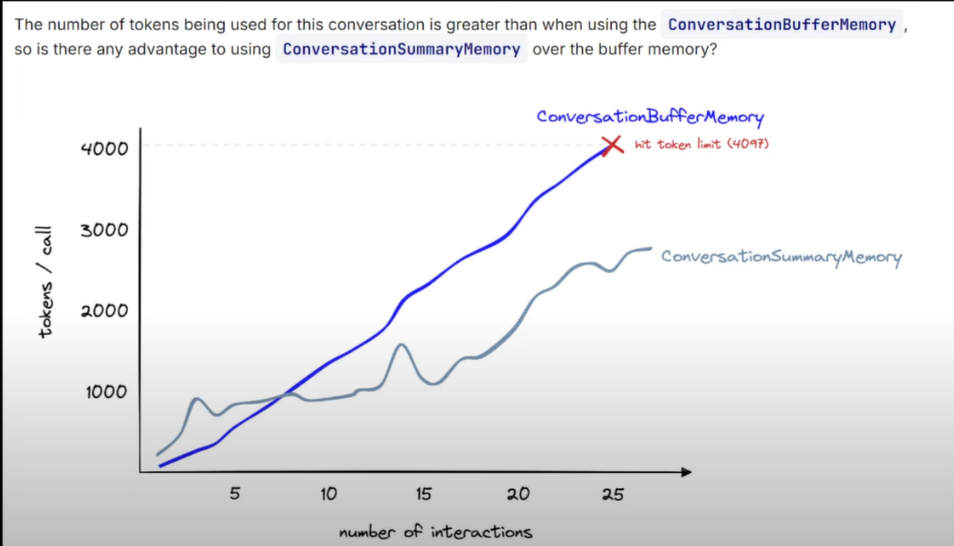

✅ Pros:
- Summarizes older interactions, reducing token usage
- Good for long-running conversations

❌ Cons:
- Summary may lose nuance
- Requires an LLM call to summarize

In [54]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant.Answer each question. If you don't know the answer, say 'I don't know'."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
        
    ]
)

In [55]:
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.3)

In [56]:
summary_memory = ConversationSummaryMemory(llm=llm, max_token_limit=1000, return_messages=True)

In [73]:
chain = (
    RunnablePassthrough.assign(history=RunnableLambda(summary_memory.load_memory_variables) | itemgetter("history"))
    | prompt
    | llm
    | StrOutputParser()
)

In [78]:
def query_llm(Input):
    try:
        response = chain.invoke({"input": Input})
        summary_memory.save_context(inputs={"input": Input}, outputs={"output": response})
        
        # summary_memory.chat_memory.add_user_message(Input)
        # summary_memory.chat_memory.add_ai_message(response)
        return response
    except Exception as e:
        print(f"Error: {e}")
        return None

In [80]:
Input = input("Enter the question to LLama3 : ")
query_llm(Input)

'I don\'t have a personal name, but you can call me "Assistant" if you\'d like. I\'m here to help answer your questions and provide information, so feel free to ask me anything.'

In [81]:
summary_memory.load_memory_variables({})

{'history': [SystemMessage(content='The human introduces themselves as Hrishikesh, and the AI greets them, offering assistance or conversation. The human then asks for their name, and the AI confirms that their name is indeed Hrishikesh. The human shares their family name, Kothawade, and the AI acknowledges this, expressing it\'s lovely to be speaking with Hrishikesh Kothawade, and inquires if there\'s something they can help with or if they\'d like to have a conversation. The AI reiterates its greeting, addressing Hrishikesh by their full name, and reconfirms its availability to provide help or engage in conversation, asking if there\'s a specific topic Hrishikesh Kothawade would like to discuss. Hrishikesh thanks the AI for the greeting and asks for the AI\'s name, and the AI responds that it doesn\'t have a personal name, but can be referred to as "Assistant" for the purpose of their conversation, reiterating its role in providing information and answering questions.', additional_kw

In [82]:
summary_memory.chat_memory.messages

[HumanMessage(content='My name is Hrishikesh!', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello Hrishikesh, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='My name is Hrishikesh!', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello Hrishikesh, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is my Name ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Your name is Hrishikesh.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is my Name ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Your name is Hrishikesh.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='My family name is Kothawade.', additional_kwargs={}, response_metadata={}),
 AIMess

##### 4. ConversationSummaryBufferMemory

It combines the two ideas. It keeps a buffer of recent interactions in memory, but rather than just completely flushing old interactions it compiles them into a summary and uses both. It uses token length rather than number of interactions to determine when to summarise interactions.

✅ Pros:
- Keeps recent buffer + summary of older context
- Best of both worlds

❌ Cons:
- More complex
- More calls (summary + message tracking)

In [6]:
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.3)
prompt = ChatPromptTemplate.from_messages( 
    [
        ("system", "You are a helpful assistant.Answer each question. If you don't know the answer, say 'I don't know'."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
        
    ]
)
summary_buffer_memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=1000, return_messages=True)

In [7]:
summary_buffer_memory.load_memory_variables({})

{'history': []}

In [8]:
conversation_chain = (
    RunnablePassthrough.assign(history=RunnableLambda(summary_buffer_memory.load_memory_variables) | itemgetter("history"))
    | prompt
    | llm
    | StrOutputParser()
)

In [9]:
def query_llm(input):
    try:
        response = conversation_chain.invoke({"input": input})
        summary_buffer_memory.save_context(inputs={"input": input}, outputs={"output": response})
        return response
    except Exception as e:
        print(f"Error: {e}")
        return None

In [14]:
Input = input("Enter the question to LLama3 : ")
query_llm(Input)

"That's great to hear, Hrishikesh. Artificial Intelligence is a rapidly evolving field with numerous applications and opportunities for growth. To continuously evolve in this field, you can consider the following:\n\n1. **Stay updated with the latest research and developments**: Follow top AI researchers, blogs, and publications to stay informed about the latest advancements and breakthroughs.\n2. **Take online courses and certifications**: Websites like Coursera, edX, and Udemy offer a wide range of AI-related courses and certifications that can help you develop new skills.\n3. **Practice with projects and datasets**: Apply your knowledge by working on projects and experimenting with different datasets to gain hands-on experience.\n4. **Join online communities and forums**: Participate in online communities like Kaggle, Reddit's r/MachineLearning, and GitHub to connect with other AI enthusiasts, learn from their experiences, and get feedback on your work.\n5. **Attend conferences and 

In [15]:
summary_buffer_memory.load_memory_variables({})["history"]

[SystemMessage(content='The human asks for an industrial revolution report in 500 words, and the AI provides a comprehensive overview of the Industrial Revolution, a transformative era in human history that marked the transition from manual labor to machine-based manufacturing, sparked by the availability of natural resources, technological innovations, and new forms of energy, and characterized by mechanization, mass production, new forms of energy, and urbanization, which had far-reaching consequences, including economic growth, improved standard of living, social changes, and environmental degradation.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='My name is Hrishikesh, What did I ask you ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='You asked me to provide an "Industrial revolution report in 500 words".', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I have interest in learning new skills and continously evolving 

##### 5. Conversation Entity Memory

In [2]:
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.3)
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant.Answer each question. If you don't know the answer, say 'I don't know'."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
        
    ]
)
entity_memory = ConversationEntityMemory(llm=llm, return_messages=True, k=10)


C:\Users\admin\AppData\Local\Temp\ipykernel_17764\3680550966.py:10: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  entity_memory = ConversationEntityMemory(llm=llm, return_messages=True, k=10)
c:\Users\admin\anaconda3\envs\env_langchain_tutorial\lib\site-packages\pydantic\main.py:214: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [3]:
entity_chain = (
    RunnablePassthrough.assign(history=RunnableLambda(entity_memory.load_memory_variables) | itemgetter("history"))
    | prompt
    | llm
    | StrOutputParser()
)

In [24]:
entity_chain.invoke({"input": "What is the capital of France?"})

'The capital of France is Paris.'

In [5]:
def query_llm(Input):
    response = entity_chain.invoke({"input": Input})
    entity_memory.load_memory_variables({"input": Input})
    entity_memory.save_context(inputs={"input": Input}, outputs={"output": response})
    return response

In [7]:
Input = input("Enter the question to LLama3 : ")
query_llm(Input)

'So, the GenAI project that Sunny and Hrishi are working on is focused on agentic AI in the healthcare sector. That sounds like a fascinating and potentially impactful project. Agentic AI refers to AI systems that can act autonomously and make decisions, which could be particularly useful in healthcare for tasks such as diagnosis, treatment planning, and patient monitoring.\n\nWhat specific aspects of healthcare is the GenAI project focusing on, such as disease diagnosis, patient outcomes, or clinical decision support?'

In [11]:
entity_memory.load_memory_variables({"input": 'Who is summy?'})

{'history': [HumanMessage(content='Sunny and Hrishi are working on the genai project.', additional_kwargs={}, response_metadata={}),
  AIMessage(content="It seems you've mentioned that Sunny and Hrishi are working on the GenAI project. Can you provide more context or information about the project, or is there something specific you'd like to know or discuss about it?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='It agentic AI project focus on the healthcare!', additional_kwargs={}, response_metadata={}),
  AIMessage(content='So, the GenAI project that Sunny and Hrishi are working on is focused on agentic AI in the healthcare sector. That sounds like a fascinating and potentially impactful project. Agentic AI refers to AI systems that can act autonomously and make decisions, which could be particularly useful in healthcare for tasks such as diagnosis, treatment planning, and patient monitoring.\n\nWhat specific aspects of healthcare is the GenAI project focusing